# Data Exploration
## Questions
1. What are the Top 3 most popular words/themes in movie plot per genre? And per year?
2. What is the pay gap between male and female actors per country and globally?

`TODO`: https://visualstudio.microsoft.com/visual-cpp-build-tools/ to make this work: https://www.datacamp.com/tutorial/wordcloud-python

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Top 3 most popular themes

In [2]:
# Import datasets
omdb_csv = Path('Datasets/omdb.csv')
omdb_df = pd.read_csv(omdb_csv)

### Word Analysis
For this part, we look at the word frequency in each movie plot. The OMDB dataset is used.

In [3]:
genre_list = omdb_df['Genre'].tolist()
genre_list

['Comedy',
 'Comedy, Drama, Romance',
 'Comedy, Crime, Drama',
 'Biography, Drama, War',
 'Drama, Family, Fantasy',
 'Comedy',
 'Comedy, Drama, Romance',
 'Comedy, Drama',
 'Comedy, Drama',
 'Action, Crime, Thriller',
 'Comedy, Romance',
 'Comedy',
 'Adventure, Comedy, Family',
 'Action, Adventure',
 'Action, Comedy, Fantasy',
 'Animation, Adventure, Family',
 'Adventure, Comedy, Sci-Fi',
 'Action, Adventure',
 'Drama, Musical',
 'Comedy, Drama, Romance',
 'Comedy, Drama, Family',
 'Action, Adventure, Comedy',
 'Comedy, Romance',
 'Action, Comedy, Crime',
 'Comedy, Family',
 'Action, Comedy',
 'Drama, Thriller',
 'Drama, Fantasy, Romance',
 'Drama, Fantasy, Romance',
 'Mystery, Thriller',
 'Adventure, Drama, Western',
 'Drama, Horror, Sci-Fi',
 'Action, Adventure, Thriller',
 'Action, Comedy, Crime',
 'Adventure, Comedy, Sci-Fi',
 'Action, Comedy, Crime',
 'Crime, Drama',
 'Action, Drama, Sport',
 'Action, Adventure, Sci-Fi',
 'Action, Thriller',
 'Drama',
 'Crime, Drama, Thriller',
 '

In [4]:
genres = []
count = -1

for genre in genre_list:
    count += 1
    print(f"{count}: {genre}")
    genres += str(genre).split(', ')

# [str.split(',') for str in genre_list]

0: Comedy
1: Comedy, Drama, Romance
2: Comedy, Crime, Drama
3: Biography, Drama, War
4: Drama, Family, Fantasy
5: Comedy
6: Comedy, Drama, Romance
7: Comedy, Drama
8: Comedy, Drama
9: Action, Crime, Thriller
10: Comedy, Romance
11: Comedy
12: Adventure, Comedy, Family
13: Action, Adventure
14: Action, Comedy, Fantasy
15: Animation, Adventure, Family
16: Adventure, Comedy, Sci-Fi
17: Action, Adventure
18: Drama, Musical
19: Comedy, Drama, Romance
20: Comedy, Drama, Family
21: Action, Adventure, Comedy
22: Comedy, Romance
23: Action, Comedy, Crime
24: Comedy, Family
25: Action, Comedy
26: Drama, Thriller
27: Drama, Fantasy, Romance
28: Drama, Fantasy, Romance
29: Mystery, Thriller
30: Adventure, Drama, Western
31: Drama, Horror, Sci-Fi
32: Action, Adventure, Thriller
33: Action, Comedy, Crime
34: Adventure, Comedy, Sci-Fi
35: Action, Comedy, Crime
36: Crime, Drama
37: Action, Drama, Sport
38: Action, Adventure, Sci-Fi
39: Action, Thriller
40: Drama
41: Crime, Drama, Thriller
42: Drama, T

In [5]:
# Remove duplicates
genres = list(dict.fromkeys(genres))

# Sort alphabetically
genres.sort()

# Drop 'nan' (last item)
genres = genres[:-1]

genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [8]:
# Source: https://www.geeksforgeeks.org/text-analysis-in-python-3/
from collections import Counter

def count_words(text):     
    text = text.lower() 
    skips = [".", ",", ":", ";", "'", '"'] 
    for ch in skips: 
        text = text.replace(ch, "") 
    word_counts = Counter(text.split(" ")) 
    return word_counts

def get_word_top50(select_genre):
    plot_by_genre = ""

    # Get plot from all movies that include the selected genre
    for index, row in omdb_df.iterrows():
        # Handle any error with missing genre
        try:
            if select_genre in omdb_df.loc[index, 'Genre']:
                plot_by_genre += omdb_df.loc[index,'Plot'] + ' '
        except:
            pass

        word_count = count_words(plot_by_genre)

    # Save word count in a DataFrame
    word_count_df = pd.DataFrame.from_dict(word_count, orient='index').reset_index()

    # Rename columns
    word_count_df = word_count_df.rename(columns={'index':'word', 0:'count'})

    # Order by most common words
    word_count_df = word_count_df.sort_values('count', ascending=False).reset_index()
    word_count_df = word_count_df[['word', 'count']]

    # Drop common words
    ignore_words = ['the', 'a', 'to', 'and', 'of', 'by', 'his', 'in', 'is', 'are', 'a', 'an', 'with', 'from', 'when', 'as', 'on', 'for', ' ', '', 'who', 'at']

    clean_word_count_df = word_count_df[:]

    for index, row in word_count_df.iterrows():
        if word_count_df.loc[index,'word'] in ignore_words:
            clean_word_count_df = clean_word_count_df.drop(index)

    # Keep only Top 50 words that appear more than once
    return clean_word_count_df.head(50)

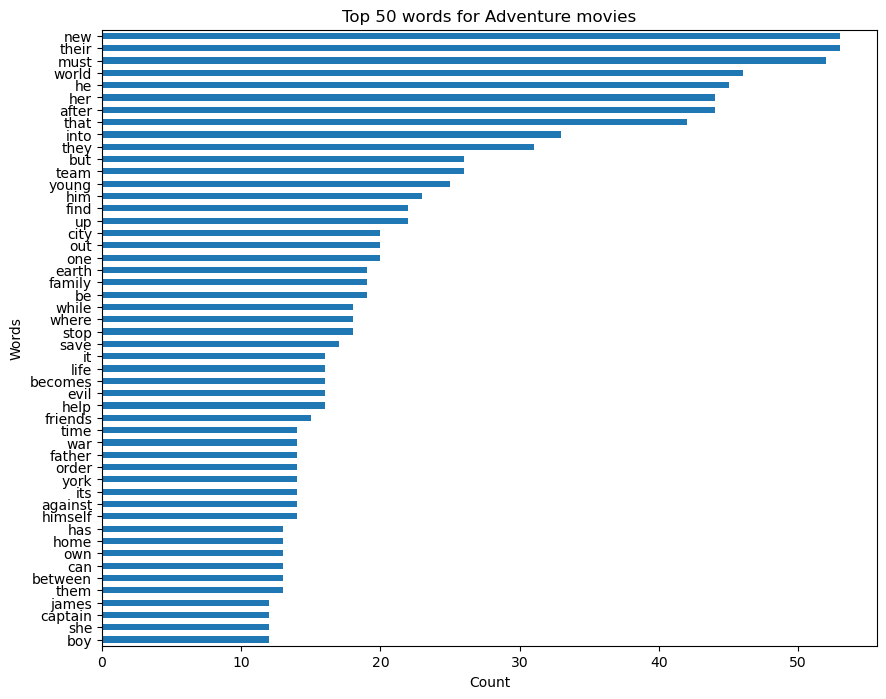

In [9]:
# Select genre
select_genre = genres[1]

# Get Top 50 words
genre_words = get_word_top50(select_genre)

# Invert order to display in hbar chart 
genre_words = genre_words.sort_values('count')
genre_words.plot.barh(x='word', y='count', figsize = (10,8), title = f"Top 50 words for {select_genre} movies", legend = False)
plt.ylabel('Words')
plt.xlabel('Count')
plt.show()


In [16]:
genre_words.to_dict('list')

{'word': ['boy',
  'she',
  'captain',
  'james',
  'them',
  'between',
  'can',
  'own',
  'home',
  'has',
  'himself',
  'against',
  'its',
  'york',
  'order',
  'father',
  'war',
  'time',
  'friends',
  'help',
  'evil',
  'becomes',
  'life',
  'it',
  'save',
  'stop',
  'where',
  'while',
  'be',
  'family',
  'earth',
  'one',
  'out',
  'city',
  'up',
  'find',
  'him',
  'young',
  'team',
  'but',
  'they',
  'into',
  'that',
  'after',
  'her',
  'he',
  'world',
  'must',
  'their',
  'new'],
 'count': [12,
  12,
  12,
  12,
  13,
  13,
  13,
  13,
  13,
  13,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  15,
  16,
  16,
  16,
  16,
  16,
  17,
  18,
  18,
  18,
  19,
  19,
  19,
  20,
  20,
  20,
  22,
  22,
  23,
  25,
  26,
  26,
  31,
  33,
  42,
  44,
  44,
  45,
  46,
  52,
  53,
  53]}

## Gender pay gap

In [71]:
# Import data
actor_csv = Path('Datasets/actor.csv')
actor_df = pd.read_csv(actor_csv)

In [72]:
# Clean data = remove unecessary column + drop all rows with NaN
clean_actor_df = actor_df[['name', 'date_of_birth', 'birth_country', 'gender', 'networth']]
clean_actor_df = clean_actor_df.dropna(axis=0,how='any')
clean_actor_df

,name,date_of_birth,birth_country,gender,networth
0,Aaron Eckhart,1968-03-12,USA,Male,16000000.0
1,Aasif Mandvi,1966-03-05,India,Male,3000000.0
2,Abe Vigoda,1921-02-24,USA,Male,10000000.0
3,Abigail Breslin,1996-04-14,USA,Female,8000000.0
4,Abraham Benrubi,1969-10-04,USA,Male,12000000.0
...,...,...,...,...,...
2582,Zac Efron,1987-10-18,USA,Male,25000000.0
2583,Zach Braff,1975-04-06,USA,Male,20000000.0
2585,Zachary Levi,1980-09-29,USA,Male,12000000.0
2586,Zachary Quinto,1977-06-02,USA,Male,20000000.0


### Preliminary questions
- How many men and women?
- What is the average net worth per gender?
- Who are the Top 10 men and women actors in terms of net worth?
- Where are the actors from?

In [73]:
# Create a DataFrame per gender
actor_m_df = clean_actor_df.loc[clean_actor_df['gender'] == 'Male',:]
actor_f_df = clean_actor_df.loc[clean_actor_df['gender'] == 'Female',:]

# Count number of data points
print(f"There are {len(actor_m_df)} male actors in the dataset.")
print(f"There are {len(actor_f_df)} female actors in the dataset.")

There are 497 male actors in the dataset.
There are 257 female actors in the dataset.


In [74]:
# Calculate the mean net worth for M and F actors
avg_networth_m = actor_m_df['networth'].mean()
avg_networth_f = actor_f_df['networth'].mean()

# Display results
print(f"Male actors' average net worth is ${avg_networth_m:,.0f}")
print(f"Female actors' average net worth is ${avg_networth_f:,.0f} ({100*avg_networth_f/avg_networth_m:.2f}% of Male actors' net worth)")

Male actors' average net worth is $111,911,509
Female actors' average net worth is $29,617,704 (26.47% of Male actors' net worth)


In [75]:
# Top 10 richest actors
top10_m = actor_m_df.sort_values('networth', ascending=False).head(10)
top10_f = actor_f_df.sort_values('networth', ascending=False).head(10)

<Axes: >

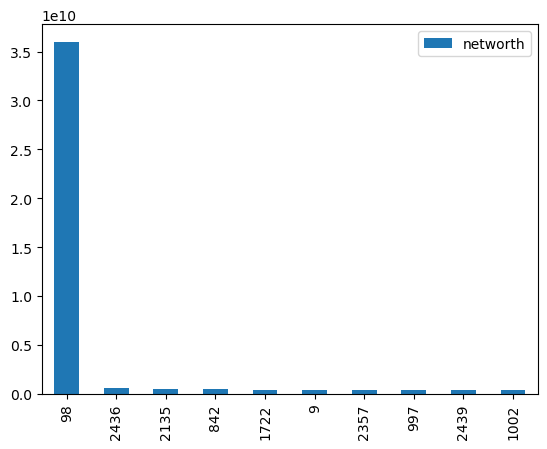

In [76]:
top10_m.plot.bar()

### Notes
- The data for male actors is dominated by a single actor (Alan Howard) that is significantly richer than all the others
- As the goal is to compare representative male actors to female one, we decided to remove this outlier for this part of the comparative analysis

C:\Users\User\AppData\Local\Temp\ipykernel_11944\340131345.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0.0, '$0'),
 Text(0, 100000000.0, '$100,000,000'),
 Text(0, 200000000.0, '$200,000,000'),
 Text(0, 300000000.0, '$300,000,000'),
 Text(0, 400000000.0, '$400,000,000'),
 Text(0, 500000000.0, '$500,000,000'),
 Text(0, 600000000.0, '$600,000,000'),
 Text(0, 700000000.0, '$700,000,000')]

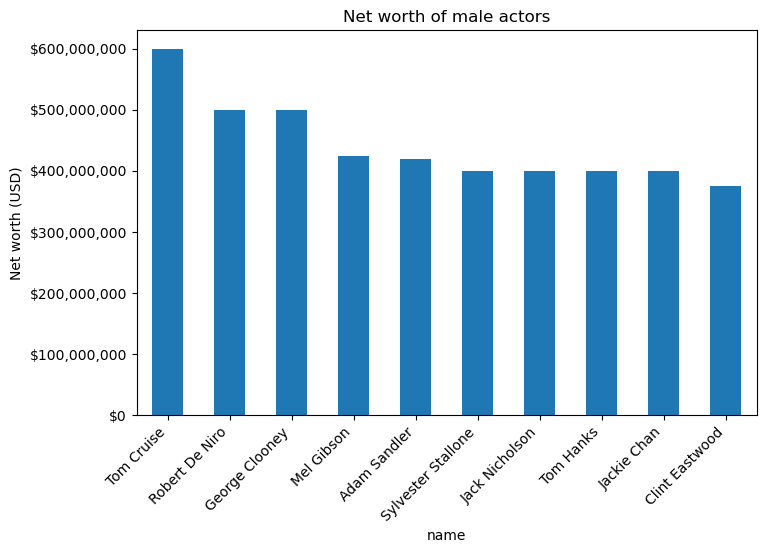

In [155]:
# Top 10 richest actors (remove outlier)
top10_m = actor_m_df.sort_values('networth', ascending=False).head(11).tail(10)

top10 = pd.concat(top10_m)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
top10_m.plot.bar(x='name',title='Net worth of male actors', legend=False, ax=ax)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Net worth (USD)')

# Set ticks in USD with , thousands
ticks = ax.get_yticks()
ax.set_yticklabels([f'${int(amt):,}' for amt in ticks])

C:\Users\User\AppData\Local\Temp\ipykernel_11944\699714903.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0.0, '$0'),
 Text(0, 50000000.0, '$50,000,000'),
 Text(0, 100000000.0, '$100,000,000'),
 Text(0, 150000000.0, '$150,000,000'),
 Text(0, 200000000.0, '$200,000,000'),
 Text(0, 250000000.0, '$250,000,000'),
 Text(0, 300000000.0, '$300,000,000'),
 Text(0, 350000000.0, '$350,000,000')]

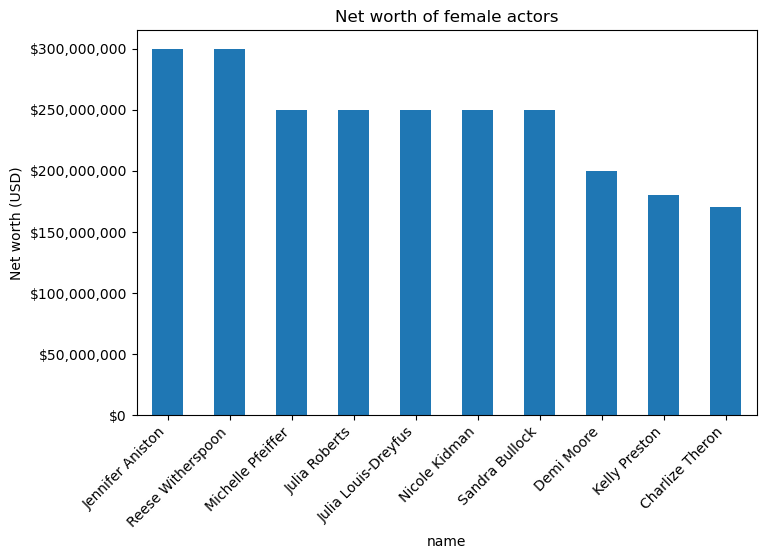

In [154]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
top10_f.plot.bar(x='name',title='Net worth of female actors', legend=False, ax=ax)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Net worth (USD)')

# Set ticks in USD with , thousands
ticks = ax.get_yticks()
ax.set_yticklabels([f'${int(amt):,}' for amt in ticks])

In [128]:
# Code from: https://python.plainenglish.io/how-to-create-a-beautify-tornado-chart-in-python-plotly-6c0519e185b4
top10 = [1,2,3,4,5,6,7,8,9,10]
sr1 = top10_m['networth'].to_list()
sr2 = top10_f['networth'].to_list()

#convert sr1
def Convert(lst):
    return [ -i for i in lst ]

sr3 = Convert(sr2)
fig = go.Figure()

fig.add_trace(go.Bar(y=top10, x=sr1,
                base=0,
                marker_color='rgb(158,202,225)',
                name='Male Actors',
                marker_line_color='rgb(8,48,107)',
                orientation='h',
                marker_line_width=1.5,
                opacity= 0.7,
                text = sr1,
                textposition='auto',
                texttemplate = "%{x:,s}(M$) "
))

fig.add_trace(go.Bar(y=top10, x=sr2,
                base=sr3,
                marker_color='crimson',
                name='Female Actors',
                marker_line_color='red',
                orientation='h',
                marker_line_width=1.5,
                opacity= 0.7,
                text = sr3,
                textposition='auto',
                texttemplate = "%{x:,s}(M$) "
))

fig.update_layout(
    height=500,
     margin=dict(t=50,l=10,b=10,r=10),
title_text="Gender Pay Gap (Top 10 Actors)",
 title_font_family="sans-serif",
 #legend_title_text=’Financials’,
 title_font_size = 25,
 title_font_color="black",
 title_x=0.5 #to adjust the position along x-axis of the title
)
fig.update_layout(barmode='overlay', 
                  xaxis_tickangle=-45, 
                   legend=dict(
                     x=0.80,
                     y=0.01,
 bgcolor='rgba(255, 255, 255, 0)',
 bordercolor='rgba(255, 255, 255, 0)'
 ),
                  yaxis=dict(
 title='Top Actors',
 titlefont_size=16,
 tickfont_size=14
 ),
                  bargap=0.30)
fig.show()

### Country of origins

In [104]:
countries_f = pd.DataFrame(actor_f_df['birth_country'].value_counts())
countries_f = countries_f.rename(columns={'birth_country': 'Female Actors'})

In [105]:
countries_f

,Female Actors
USA,209
UK,24
Australia,4
Canada,4
Italy,3
France,3
Sweden,2
Brazil,1
Germany,1
Netherlands,1


In [106]:
countries_m = pd.DataFrame(actor_m_df['birth_country'].value_counts())
countries_m = countries_m.rename(columns={'birth_country': 'Male Actors'})

In [118]:
# Merge into one DataFrame
actors_per_countries = countries_f.join(countries_m, how = 'outer')
actors_per_countries = actors_per_countries.fillna(0)
actors_per_countries = actors_per_countries.sort_values('Male Actors', ascending=False)
actors_per_countries

,Female Actors,Male Actors
USA,209.0,357.0
UK,24.0,70.0
Canada,4.0,21.0
Australia,4.0,7.0
Ireland,1.0,5.0
Italy,3.0,4.0
Mexico,0.0,3.0
Japan,0.0,2.0
England,0.0,2.0
Germany,1.0,2.0


<Axes: >

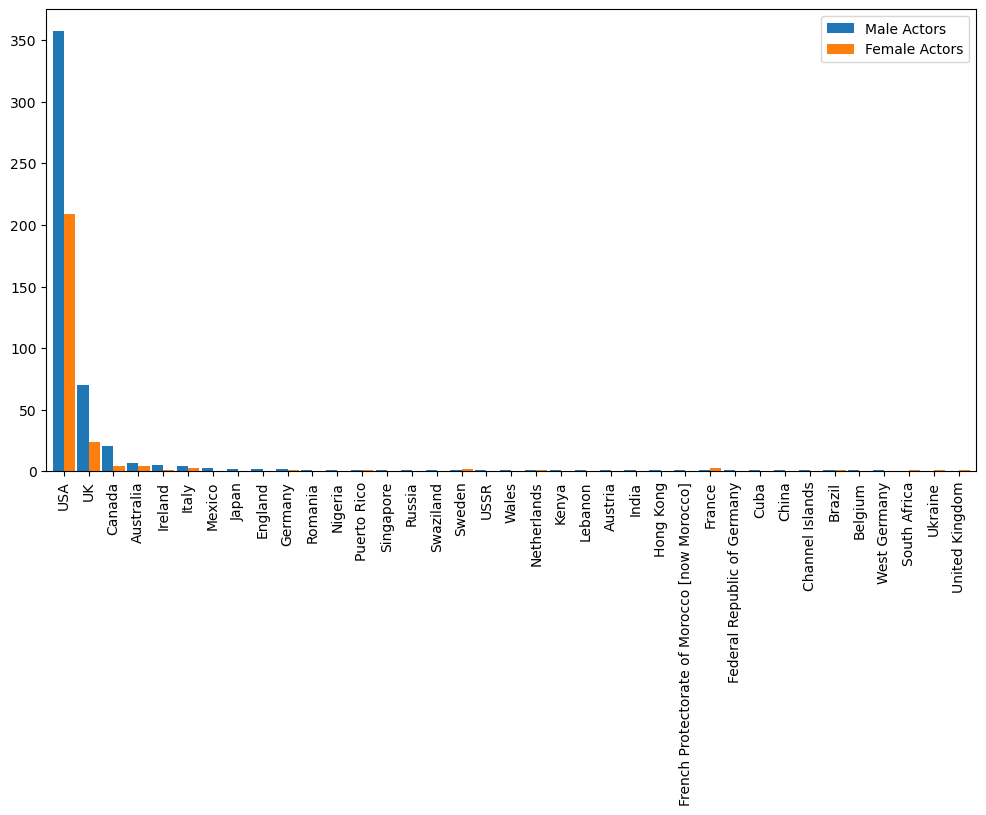

In [127]:
actors_per_countries.plot.bar(y = ['Male Actors', 'Female Actors'], figsize=(12,6), width=0.9, align='center')